# Assignment 1: Gradient Descent

## Given

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def func(x):
    ''' The function to do gradient descent on. '''
    return (x-1)**2*(x-2)*(x+1)

def plot_gradient_descent(f,gx, annotate):
    ''' Plots the function f an the path that is traversed during gradient descent
    Args:
        f: The function
        gx: An array of all x values [x_init, x1, x2, ... xNumSteps]
        annotate: A boolean to enable / disable annotations
    '''
    if gx.max() > 3.0 or gx.min() < -1.5:
        print('Some x values are out of plotting range! They are clipped to (-1.5, 3.0) in the plot.')
        gx = np.clip(gx, -1.5, 3.0)
    x = np.linspace(-1,2.5,200)
    plt.figure(figsize=(11,4))
    plt.axis([-1.2, 2.7, -3.2, 4.2])
    plt.plot(x, f(x),'b-',label='f(x)')
    plt.plot(gx, f(gx),'ro--',label='iterations')
    plt.grid(True)
    plt.title('Gradient Descent Steps', fontsize=14)
    plt.legend(loc='upper left', fontsize=14)
    if annotate:
        for i, xy in enumerate(zip(gx, f(gx)+0.4)):
            plt.annotate('%s' % i, xy=xy, textcoords='data', color='r')

## Exercise 1: Basic Gradient Descent (7 points)

### 1. Implement numerical derivative (2 points)
First start by creating a function that computes the numerical derivative of a given one dimensional python function using central differences.

Implement the difference quotient
$$ \frac{\partial f}{\partial x}  = \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}.$$
Use $\epsilon=1e-6$. $f$ is given by `func()`.

In [3]:
def derivative(f, x, eps = 1e-6):
    '''
    Computes the numerical derivative of f at x using central differences

    Arguments:
    f --  A callable python one dimensional function.
    x -- A float

    Returns:
    grad - A float
    '''
    num=(f(x+eps)-f(x-eps))/(2*eps)
    return num
    pass # this does nothing. its just here because empty function bodies are invalid syntax.

In [ ]:
derivative(func,0.0)

3.000000000086267

**Expected Output**:

`3.000000000086267`

### 2. Implement gradient descent (3 points)
Build a function that performs gradient descent for 20 steps on function $f$ at starting position $x_{init}$.\
 **Mathematical Expression**:

$$ x_i = x_{i-1} - \eta\cdot g $$

In [4]:
def gradient_descent(f, init_x, learning_rate, num_steps= 20, annotate=False):
    '''
    Performs gradient descent and plots the results
    
    Arguments:
    f --  A callable python one dimensionalfunction.
    init_x -- A scalar, starting point for gradient descent.
    learning_rate -- A scalar, parameter of gradient descent (eta).
    num_steps -- An int, number of update steps.
    annotate -- A bool, switches annotations in the plot on or off.
    
    Return:
    x -- A scalar, result of the gradient descent
    '''

    # Use the plot_gradient_descent() function for plots.
    ar=[init_x]
    for i in range(1,num_steps+1):
      ar.insert(i,ar[i-1]-(learning_rate*derivative(f,ar[i-1])))
    
    plot_gradient_descent(f,np.array(ar),annotate)
    return ar

    pass

### 3. Investigate the behavior (2 points)
Try your program with different learning rates (`0.01` , `0.05` , `0.2` , `0.25` , `0.4`) and starting points (`0.0` , `1.0`, `1.5`, `2.2`).
Do we always reach the global minimum? Explain the behavior you observe.


For starting point 0.0, learning rate above 0.5 is not able to converge at global minina.

For starting point 1.0, it dosen't move as it is at local maxima.

For starting point 1.5, it is not able to converge at global minima.

For starting point 2.2, it is not able to converge at global minima.

On keeping the learning the rate constant and varying the initial positions, the conclusion was that the initial position plays a more important role than learning rate.

Some x values are out of plotting range! They are clipped to (-1.5, 3.0) in the plot.


[2.2,
 -0.051200000311093063,
 -1.0569145591215818,
 3.8045952214716054,
 -31.41237346022339,
 46491.80921453484,
 -140681139153508.17,
 -140681139153508.17,
 -140681139153508.17,
 -140681139153508.17,
 -140681139153508.17,
 -140681139153508.17,
 -140681139153508.17,
 -140681139153508.17,
 -140681139153508.17,
 -140681139153508.17,
 -140681139153508.17,
 -140681139153508.17,
 -140681139153508.17,
 -140681139153508.17,
 -140681139153508.17]

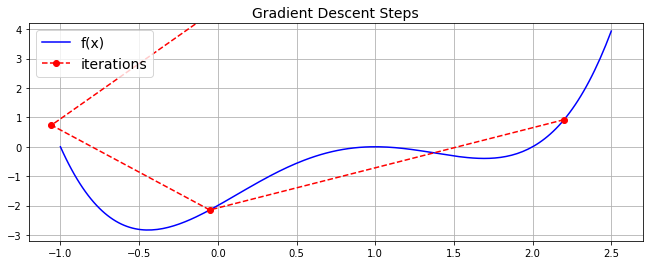

In [15]:
gradient_descent(func,2.2,0.35)


## Exercise 2: Momentum Optimizer (3 points)

### 1. Implement momentum optimizer (2 points)
To improve the performance of gradient descent we will introduce a momentum term.
The momentum $m$ is a moving average of update $\eta \cdot g$. \
 **Mathematical Expression**:

$$ m_i = \gamma \cdot m_{i-1} +\eta \cdot g $$
$$ x_i = x_{i-1} - m_i $$

In [17]:
def momentum_descent(f, init_x, learning_rate, gamma = 0.9, num_steps=20, annotate = True):
    '''
    Performs gradient descent with momentum and plots the results
    
    Arguments:
    f --  A callable python function with one dimensional output.
    init_x -- A scalar, starting point for gradient descent.
    learning_rate -- A scalar, parameter of gradient descent (eta).
    gamma -- A scalar, parameter of momentum descent.
    num_steps -- An int, number of update steps.
    annotate -- A bool, switches annotations in the plot on or off.
    
    Return:
    x -- A scalar, result of the gradient descent
    '''
    ar=[init_x]
    m=[0]
    for i in range(1,num_steps+1):
      m.insert(i,(gamma*m[i-1])+(learning_rate*derivative(f,ar[i-1])))
      ar.insert(i,ar[i-1]-m[i])
    
    plot_gradient_descent(f,np.array(ar),annotate)
    return np.array(ar)
          
    pass

### 2. Investigate the behavior (1 point)
Again, study the behaviour of your program with different learning rates and starting points.
Does this work better than plain gradient descent? Describe how the momentum helps convergence.

The adding of the momentum makes the congervence to minima faster and also takes less number oscillations but in limited number of steps it might miss the minima and pass it because of the momentum.

It works better with low learning rate (N<0.05) and with high learning rates it misses 

array([ 2.5       ,  2.3575    ,  2.12820143,  1.8713349 ,  1.62577013,
        1.40824322,  1.2210773 ,  1.05957261,  0.91648636,  0.78418225,
        0.65548062,  0.52394326,  0.38403401,  0.23144287,  0.06380701,
       -0.11798537, -0.30792026, -0.4930021 , -0.65304813, -0.76450586,
       -0.80905227])

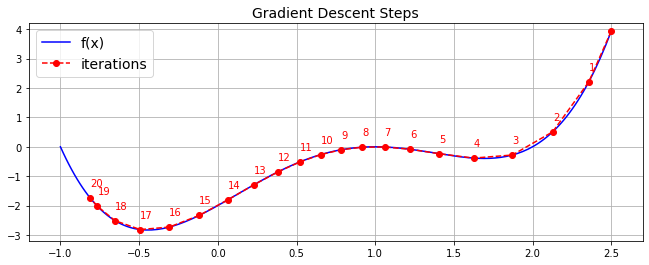

In [19]:
momentum_descent(func,2.5,0.01)